<a href="https://colab.research.google.com/github/Alisser2001/kaggle-solution/blob/main/02%20-%20preprocesado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!kaggle competitions download -c udea-ai4eng-20242
!chmod 600 ./kaggle.json

  0% 0.00/20.1M [00:00<?, ?B/s]
100% 20.1M/20.1M [00:00<00:00, 231MB/s]


In [124]:
!unzip udea-ai4eng-20242.zip

Archive:  udea-ai4eng-20242.zip
  inflating: submission_example.csv  
  inflating: test.csv                
  inflating: train.csv               


In [125]:
import pandas as pd

file_path = os.path.join('train.csv')
train = pd.read_csv(file_path)

train.columns = ['ID', 'Periodo', 'Programa_Academico', 'Departamento', 'Valor_Matricula',
              'Horas_Trabajo_Semanal', 'Estrato_Vivienda', 'Tiene_Internet',
              'Educacion_Padre', 'Educacion_Madre', 'Pago_Matricula_Propio',
              'Rendimiento_Global']

In [126]:
print("\n\nConteo de valores no nulos por columna:\n")
print(train.count())

print("\n\nConteo de valores faltantes por columna:\n")
print(train.isnull().sum())



Conteo de valores no nulos por columna:

ID                       692500
Periodo                  692500
Programa_Academico       692500
Departamento             692500
Valor_Matricula          686213
Horas_Trabajo_Semanal    661643
Estrato_Vivienda         660363
Tiene_Internet           665871
Educacion_Padre          669322
Educacion_Madre          668836
Pago_Matricula_Propio    686002
Rendimiento_Global       692500
dtype: int64


Conteo de valores faltantes por columna:

ID                           0
Periodo                      0
Programa_Academico           0
Departamento                 0
Valor_Matricula           6287
Horas_Trabajo_Semanal    30857
Estrato_Vivienda         32137
Tiene_Internet           26629
Educacion_Padre          23178
Educacion_Madre          23664
Pago_Matricula_Propio     6498
Rendimiento_Global           0
dtype: int64


In [127]:
print(train['Periodo'].value_counts())
print(train['Periodo'].value_counts(normalize=True) * 100)

Periodo
20195    180873
20203    171838
20212    171412
20183    164818
20194      1472
20213      1178
20202       490
20184       254
20196       165
Name: count, dtype: int64
Periodo
20195    26.118845
20203    24.814152
20212    24.752635
20183    23.800433
20194     0.212563
20213     0.170108
20202     0.070758
20184     0.036679
20196     0.023827
Name: proportion, dtype: float64


In [128]:
train.loc[:, 'Periodo'] = train['Periodo'].astype(str).str[:4]
print(train['Periodo'].value_counts())
print(train['Periodo'].value_counts(normalize=True) * 100)

Periodo
2019    182510
2021    172590
2020    172328
2018    165072
Name: count, dtype: int64
Periodo
2019    26.355235
2021    24.922744
2020    24.884910
2018    23.837112
Name: proportion, dtype: float64


<ipython-input-128-1964de196917>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['2021' '2021' '2020' ... '2018' '2019' '2019']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train.loc[:, 'Periodo'] = train['Periodo'].astype(str).str[:4]


In [129]:
print(train['Programa_Academico'].value_counts())
print(train['Programa_Academico'].value_counts(normalize=True) * 100)

Programa_Academico
DERECHO                                                   53244
ADMINISTRACION DE EMPRESAS                                51902
CONTADURIA PUBLICA                                        39664
PSICOLOGIA                                                31932
INGENIERIA INDUSTRIAL                                     28481
                                                          ...  
LICENCIATURA EN ESPAÑOL Y FILOLOGÍA                           1
ADMINISTRACION EN NEGOCIOS INTERNACIONALES                    1
ADMINISTRACION DE COMERCIO EXTERIOR                           1
LICENCIATURA EN EDUCACI¿N F¿SICA RECREACI¿N Y DEPORTES        1
PROFESIONAL EN INVESTIGACIÓN CRIMINAL                         1
Name: count, Length: 948, dtype: int64
Programa_Academico
DERECHO                                                   7.688664
ADMINISTRACION DE EMPRESAS                                7.494874
CONTADURIA PUBLICA                                        5.727653
PSICOLOGIA        

In [130]:
train.loc[train['Programa_Academico'].str.contains(r'(?i)ingenier[ií¿]a|computaci[oó¿]n|software', regex=True), 'Programa_Academico'] = 'INGENIERÍA Y TECNOLOGÍA'
train.loc[train['Programa_Academico'].str.contains(r'(?i)medicina|salud|farmac|enferm|terapia|psic[oó]|odont|opto|nutri|quirur|bacte|geron|fonoa', regex=True), 'Programa_Academico'] = 'CIENCIAS DE LA SALUD'
train.loc[train['Programa_Academico'].str.contains(r'(?i)licenciatura|deport|pedag|recrea', regex=True), 'Programa_Academico'] = 'EDUCACIÓN Y PEDAGOGÍA'
train.loc[train['Programa_Academico'].str.contains(r'(?i)lengua|traducc|period[ií¿]s|inform|comunica|ling[uü]i|archiv|filo|litera|biblio', regex=True), 'Programa_Academico'] = 'CIENCIAS DE LA INFORMACIÓN Y LA COMUNICACIÓN'
train.loc[train['Programa_Academico'].str.contains(r'(?i)contadur[ií]a|comerci|econ[oó]|finan[cz]', regex=True), 'Programa_Academico'] = 'CIENCIAS ECONÓMICAS Y FINANCIERAS'
train.loc[train['Programa_Academico'].str.contains(r'(?i)soci[oa]|relaciones|pol[ií]tic[oa]|historia|teolo|antro|famil|bibli', regex=True), 'Programa_Academico'] = 'CIENCIAS SOCIALES Y HUMANIDADES'
train.loc[train['Programa_Academico'].str.contains(r'(?i)empresa|negocio|t[uú¿]r[ií¿]s|p[uú¿]blic|hotel|mark|mercad|log[ií¿]st|administraci[oó]n|producto', regex=True), 'Programa_Academico'] = 'ADMINISTRACIÓN Y NEGOCIOS'
train.loc[train['Programa_Academico'].str.contains(r'(?i)criminal|jur[ií]|policia|derecho', regex=True), 'Programa_Academico'] = 'CIENCIAS JURÍDICAS'
train.loc[train['Programa_Academico'].str.contains(r'(?i)militar|marina|naval', regex=True), 'Programa_Academico'] = 'CIENCIAS MILITARES'
train.loc[train['Programa_Academico'].str.contains(r'(?i)arqui|urba|civil|territo|constru', regex=True), 'Programa_Academico'] = 'ARQUITECTURA Y URBANISMO'
train.loc[train['Programa_Academico'].str.contains(r'(?i)arte|teatr|m[uú¿]sic|moda|gr[aáÀ]fic|medi[oa]|cine|visual|espacio|anima|gastro|danza|textil|radio|vestua|costura|mueble|banda|cultura|dise[ñn]o|digital|fotog', regex=True), 'Programa_Academico'] = 'ARTES Y HUMANIDADES'
train.loc[train['Programa_Academico'].str.contains(r'(?i)estad[ií¿]stica|f[ií¿]sica|qu[ií¿]mica|biolog[ií¿]a|matem[aá¿]tica|geograf[ií¿]a|geo[lc]|ambient|ecolo|astro|acui|agro|arque|biotec|zoo|ocean|mercan', regex=True), 'Programa_Academico'] = 'CIENCIAS EXACTAS Y NATURALES'

#for categoria in train['Programa_Academico'].unique():
#    print(f"\nCategoría: {categoria}")
#    print(train[train['Programa_Academico'] == categoria]['Programa_Academico_Original'].unique())

print(train['Programa_Academico'].value_counts())
print(train['Programa_Academico'].value_counts(normalize=True) * 100)

Programa_Academico
INGENIERÍA Y TECNOLOGÍA                         148499
CIENCIAS DE LA SALUD                            130466
ADMINISTRACIÓN Y NEGOCIOS                       121666
CIENCIAS ECONÓMICAS Y FINANCIERAS                76867
EDUCACIÓN Y PEDAGOGÍA                            69746
CIENCIAS JURÍDICAS                               54729
CIENCIAS DE LA INFORMACIÓN Y LA COMUNICACIÓN     23928
CIENCIAS SOCIALES Y HUMANIDADES                  23136
ARTES Y HUMANIDADES                              17034
CIENCIAS EXACTAS Y NATURALES                     12377
ARQUITECTURA Y URBANISMO                         12208
CIENCIAS MILITARES                                1844
Name: count, dtype: int64
Programa_Academico
INGENIERÍA Y TECNOLOGÍA                         21.443899
CIENCIAS DE LA SALUD                            18.839856
ADMINISTRACIÓN Y NEGOCIOS                       17.569097
CIENCIAS ECONÓMICAS Y FINANCIERAS               11.099928
EDUCACIÓN Y PEDAGOGÍA                       

In [131]:
print(train['Departamento'].value_counts())
print(train['Departamento'].value_counts(normalize=True) * 100)

Departamento
BOGOTÁ             282159
ANTIOQUIA           83607
VALLE               44588
ATLANTICO           41020
SANTANDER           28828
NORTE SANTANDER     22588
BOLIVAR             20629
BOYACA              14048
CUNDINAMARCA        14018
NARIÑO              13454
RISARALDA           12679
CORDOBA             12188
TOLIMA              11921
CALDAS              11640
CAUCA               11471
HUILA                9995
MAGDALENA            9512
SUCRE                8674
CESAR                8279
QUINDIO              8229
META                 7910
LA GUAJIRA           4778
CHOCO                4289
CAQUETA              2659
CASANARE             1852
PUTUMAYO              795
ARAUCA                589
AMAZONAS               40
GUAVIARE               37
VAUPES                 14
SAN ANDRES             10
Name: count, dtype: int64
Departamento
BOGOTÁ             40.744982
ANTIOQUIA          12.073213
VALLE               6.438700
ATLANTICO           5.923466
SANTANDER           4.1628

In [132]:
region_mapping = {
    'BOGOTÁ': 'Andina', 'ANTIOQUIA': 'Andina', 'BOYACA': 'Andina', 'CALDAS': 'Andina',
    'CUNDINAMARCA': 'Andina', 'HUILA': 'Andina', 'NORTE SANTANDER': 'Andina', 'SANTANDER': 'Andina',
    'TOLIMA': 'Andina', 'RISARALDA': 'Andina', 'QUINDIO': 'Andina', 'CAUCA': 'Andina', 'NARIÑO': 'Andina',

    'ATLANTICO': 'Caribe', 'BOLIVAR': 'Caribe', 'CESAR': 'Caribe', 'CORDOBA': 'Caribe',
    'LA GUAJIRA': 'Caribe', 'MAGDALENA': 'Caribe', 'SUCRE': 'Caribe', 'SAN ANDRES': 'Caribe',

    'VALLE': 'Pacífica', 'CHOCO': 'Pacífica',

    'META': 'Orinoquía y Amazonía', 'CAQUETA': 'Orinoquía y Amazonía', 'CASANARE': 'Orinoquía y Amazonía',
    'ARAUCA': 'Orinoquía y Amazonía', 'AMAZONAS': 'Orinoquía y Amazonía', 'GUAVIARE': 'Orinoquía y Amazonía',
    'PUTUMAYO': 'Orinoquía y Amazonía', 'VAUPES': 'Orinoquía y Amazonía'
}
train.loc[:, 'Departamento'] = train['Departamento'].map(region_mapping)
print(train['Departamento'].value_counts())
print(train['Departamento'].value_counts(normalize=True) * 100)

Departamento
Andina                  524637
Caribe                  105090
Pacífica                 48877
Orinoquía y Amazonía     13896
Name: count, dtype: int64
Departamento
Andina                  75.759856
Caribe                  15.175451
Pacífica                 7.058051
Orinoquía y Amazonía     2.006643
Name: proportion, dtype: float64


In [133]:
print(train['Valor_Matricula'].value_counts())
print(train['Valor_Matricula'].value_counts(normalize=True) * 100)

Valor_Matricula
Entre 1 millón y menos de 2.5 millones      204048
Entre 2.5 millones y menos de 4 millones    127430
Menos de 500 mil                             80263
Entre 500 mil y menos de 1 millón            78704
Entre 4 millones y menos de 5.5 millones     69736
Más de 7 millones                            68014
Entre 5.5 millones y menos de 7 millones     38490
No pagó matrícula                            19528
Name: count, dtype: int64
Valor_Matricula
Entre 1 millón y menos de 2.5 millones      29.735374
Entre 2.5 millones y menos de 4 millones    18.570036
Menos de 500 mil                            11.696514
Entre 500 mil y menos de 1 millón           11.469325
Entre 4 millones y menos de 5.5 millones    10.162442
Más de 7 millones                            9.911500
Entre 5.5 millones y menos de 7 millones     5.609046
No pagó matrícula                            2.845764
Name: proportion, dtype: float64


In [134]:
train.loc[train['Valor_Matricula'] == 'No pagó matrícula', 'Valor_Matricula'] = 'No pagó matrícula'
train.loc[train['Valor_Matricula'] == 'Menos de 500 mil', 'Valor_Matricula'] = 'Bajo'
train.loc[train['Valor_Matricula'].isin(['Entre 500 mil y menos de 1 millón',
                                    'Entre 1 millón y menos de 2.5 millones']),
        'Valor_Matricula'] = 'Medio'
train.loc[train['Valor_Matricula'].isin(['Entre 2.5 millones y menos de 4 millones',
                                    'Entre 4 millones y menos de 5.5 millones',
                                    'Entre 5.5 millones y menos de 7 millones']),
        'Valor_Matricula'] = 'Alto'
train.loc[train['Valor_Matricula'] == 'Más de 7 millones', 'Valor_Matricula'] = 'Muy alto'
print(train['Valor_Matricula'].value_counts())
print(train['Valor_Matricula'].value_counts(normalize=True) * 100)

Valor_Matricula
Medio                282752
Alto                 235656
Bajo                  80263
Muy alto              68014
No pagó matrícula     19528
Name: count, dtype: int64
Valor_Matricula
Medio                41.204699
Alto                 34.341524
Bajo                 11.696514
Muy alto              9.911500
No pagó matrícula     2.845764
Name: proportion, dtype: float64


In [135]:
import numpy as np

moda = train['Valor_Matricula'].value_counts().index[:3]
num_missing = train['Valor_Matricula'].isna().sum()
moda_repartition = np.repeat(moda, num_missing // 3)
rest = num_missing % 3
if rest > 0:
    moda_repartition = np.concatenate([moda_repartition, moda[:rest]])
train.loc[train['Valor_Matricula'].isna(), 'Valor_Matricula'] = moda_repartition

print(train['Valor_Matricula'].value_counts())
print(train['Valor_Matricula'].value_counts(normalize=True) * 100)

print("\n\nConteo de valores faltantes por columna:\n")
print(train.isnull().sum())

Valor_Matricula
Medio                284848
Alto                 237752
Bajo                  82358
Muy alto              68014
No pagó matrícula     19528
Name: count, dtype: int64
Valor_Matricula
Medio                41.133285
Alto                 34.332419
Bajo                 11.892852
Muy alto              9.821516
No pagó matrícula     2.819928
Name: proportion, dtype: float64


Conteo de valores faltantes por columna:

ID                           0
Periodo                      0
Programa_Academico           0
Departamento                 0
Valor_Matricula              0
Horas_Trabajo_Semanal    30857
Estrato_Vivienda         32137
Tiene_Internet           26629
Educacion_Padre          23178
Educacion_Madre          23664
Pago_Matricula_Propio     6498
Rendimiento_Global           0
dtype: int64


In [136]:
print(train['Horas_Trabajo_Semanal'].value_counts())
print(train['Horas_Trabajo_Semanal'].value_counts(normalize=True) * 100)

Horas_Trabajo_Semanal
Más de 30 horas        249352
0                      116550
Entre 11 y 20 horas    115857
Entre 21 y 30 horas     92693
Menos de 10 horas       87191
Name: count, dtype: int64
Horas_Trabajo_Semanal
Más de 30 horas        37.686789
0                      17.615240
Entre 11 y 20 horas    17.510500
Entre 21 y 30 horas    14.009519
Menos de 10 horas      13.177952
Name: proportion, dtype: float64


In [137]:
moda = train['Horas_Trabajo_Semanal'].value_counts().index[:5]
num_missing = train['Horas_Trabajo_Semanal'].isna().sum()
moda_repartition = np.repeat(moda, num_missing // 5)
rest = num_missing % 5
if rest > 0:
    moda_repartition = np.concatenate([moda_repartition, moda[:rest]])
train.loc[train['Horas_Trabajo_Semanal'].isna(), 'Horas_Trabajo_Semanal'] = moda_repartition

print(train['Horas_Trabajo_Semanal'].value_counts())
print(train['Horas_Trabajo_Semanal'].value_counts(normalize=True) * 100)

print("\n\nConteo de valores faltantes por columna:\n")
print(train.isnull().sum())

Horas_Trabajo_Semanal
Más de 30 horas        255524
0                      122722
Entre 11 y 20 horas    122028
Entre 21 y 30 horas     98864
Menos de 10 horas       93362
Name: count, dtype: int64
Horas_Trabajo_Semanal
Más de 30 horas        36.898773
0                      17.721588
Entre 11 y 20 horas    17.621372
Entre 21 y 30 horas    14.276390
Menos de 10 horas      13.481877
Name: proportion, dtype: float64


Conteo de valores faltantes por columna:

ID                           0
Periodo                      0
Programa_Academico           0
Departamento                 0
Valor_Matricula              0
Horas_Trabajo_Semanal        0
Estrato_Vivienda         32137
Tiene_Internet           26629
Educacion_Padre          23178
Educacion_Madre          23664
Pago_Matricula_Propio     6498
Rendimiento_Global           0
dtype: int64


In [138]:
print(train['Estrato_Vivienda'].value_counts())
print(train['Estrato_Vivienda'].value_counts(normalize=True) * 100)

Estrato_Vivienda
Estrato 2      232671
Estrato 3      210685
Estrato 1      111991
Estrato 4       65514
Estrato 5       23608
Estrato 6       12605
Sin Estrato      3289
Name: count, dtype: int64
Estrato_Vivienda
Estrato 2      35.233803
Estrato 3      31.904422
Estrato 1      16.959006
Estrato 4       9.920907
Estrato 5       3.575003
Estrato 6       1.908799
Sin Estrato     0.498059
Name: proportion, dtype: float64


In [139]:
moda = train['Estrato_Vivienda'].value_counts().index[:3]
num_missing = train['Estrato_Vivienda'].isna().sum()
moda_repartition = np.repeat(moda, num_missing // 3)
rest = num_missing % 3
if rest > 0:
    moda_repartition = np.concatenate([moda_repartition, moda[:rest]])
train.loc[train['Estrato_Vivienda'].isna(), 'Estrato_Vivienda'] = moda_repartition

print(train['Estrato_Vivienda'].value_counts())
print(train['Estrato_Vivienda'].value_counts(normalize=True) * 100)

print("\n\nConteo de valores faltantes por columna:\n")
print(train.isnull().sum())

Estrato_Vivienda
Estrato 2      243384
Estrato 3      221397
Estrato 1      122703
Estrato 4       65514
Estrato 5       23608
Estrato 6       12605
Sin Estrato      3289
Name: count, dtype: int64
Estrato_Vivienda
Estrato 2      35.145704
Estrato 3      31.970686
Estrato 1      17.718845
Estrato 4       9.460505
Estrato 5       3.409097
Estrato 6       1.820217
Sin Estrato     0.474946
Name: proportion, dtype: float64


Conteo de valores faltantes por columna:

ID                           0
Periodo                      0
Programa_Academico           0
Departamento                 0
Valor_Matricula              0
Horas_Trabajo_Semanal        0
Estrato_Vivienda             0
Tiene_Internet           26629
Educacion_Padre          23178
Educacion_Madre          23664
Pago_Matricula_Propio     6498
Rendimiento_Global           0
dtype: int64


In [140]:
print(train['Tiene_Internet'].value_counts())
print(train['Tiene_Internet'].value_counts(normalize=True) * 100)

Tiene_Internet
Si    592514
No     73357
Name: count, dtype: int64
Tiene_Internet
Si    88.983302
No    11.016698
Name: proportion, dtype: float64


In [141]:
proporcion_si = 0.89
proporcion_no = 0.11
num_missing = train['Tiene_Internet'].isna().sum()
num_si = int(num_missing * proporcion_si)
num_no = num_missing - num_si
repartition = ['Si'] * num_si + ['No'] * num_no
np.random.shuffle(repartition)
train.loc[train['Tiene_Internet'].isna(), 'Tiene_Internet'] = repartition

print(train['Tiene_Internet'].value_counts())
print(train['Tiene_Internet'].value_counts(normalize=True) * 100)

print("\n\nConteo de valores faltantes por columna:\n")
print(train.isnull().sum())

Tiene_Internet
Si    616213
No     76287
Name: count, dtype: int64
Tiene_Internet
Si    88.983827
No    11.016173
Name: proportion, dtype: float64


Conteo de valores faltantes por columna:

ID                           0
Periodo                      0
Programa_Academico           0
Departamento                 0
Valor_Matricula              0
Horas_Trabajo_Semanal        0
Estrato_Vivienda             0
Tiene_Internet               0
Educacion_Padre          23178
Educacion_Madre          23664
Pago_Matricula_Propio     6498
Rendimiento_Global           0
dtype: int64


In [142]:
print(train['Educacion_Padre'].value_counts())
print(train['Educacion_Padre'].value_counts(normalize=True) * 100)

Educacion_Padre
Secundaria (Bachillerato) completa      128289
Primaria incompleta                     125675
Educación profesional completa           83117
Secundaria (Bachillerato) incompleta     71654
Técnica o tecnológica completa           62995
Primaria completa                        55958
Postgrado                                44169
Educación profesional incompleta         27084
Técnica o tecnológica incompleta         22552
Ninguno                                  22008
No sabe                                  16592
No Aplica                                 9229
Name: count, dtype: int64
Educacion_Padre
Secundaria (Bachillerato) completa      19.167008
Primaria incompleta                     18.776463
Educación profesional completa          12.418089
Secundaria (Bachillerato) incompleta    10.705460
Técnica o tecnológica completa           9.411763
Primaria completa                        8.360401
Postgrado                                6.599066
Educación profesional incomp

In [143]:
train.loc[train['Educacion_Padre'].isin([
    'Primaria incompleta', 'Primaria completa',
    'Secundaria (Bachillerato) incompleta'
]), 'Educacion_Padre'] = 'Bajo'

train.loc[train['Educacion_Padre'].isin([
    'Secundaria (Bachillerato) completa',
    'Técnica o tecnológica incompleta',
    'Técnica o tecnológica completa'
]), 'Educacion_Padre'] = 'Medio'

train.loc[train['Educacion_Padre'].isin([
    'Educación profesional incompleta',
    'Educación profesional completa',
    'Postgrado'
]), 'Educacion_Padre'] = 'Alto'

train.loc[train['Educacion_Padre'].isin([
    'Ninguno', 'No sabe', 'No Aplica'
]), 'Educacion_Padre'] = 'Sin Educación'
print(train['Educacion_Padre'].value_counts())
print(train['Educacion_Padre'].value_counts(normalize=True) * 100)

Educacion_Padre
Bajo             253287
Medio            213836
Alto             154370
Sin Educación     47829
Name: count, dtype: int64
Educacion_Padre
Bajo             37.842324
Medio            31.948151
Alto             23.063638
Sin Educación     7.145888
Name: proportion, dtype: float64


In [144]:
moda = train['Educacion_Padre'].value_counts().index[:3]
num_missing = train['Educacion_Padre'].isna().sum()
moda_repartition = np.repeat(moda, num_missing // 3)
rest = num_missing % 3
if rest > 0:
    moda_repartition = np.concatenate([moda_repartition, moda[:rest]])
train.loc[train['Educacion_Padre'].isna(), 'Educacion_Padre'] = moda_repartition

print(train['Educacion_Padre'].value_counts())
print(train['Educacion_Padre'].value_counts(normalize=True) * 100)

print("\n\nConteo de valores faltantes por columna:\n")
print(train.isnull().sum())

Educacion_Padre
Bajo             261013
Medio            221562
Alto             162096
Sin Educación     47829
Name: count, dtype: int64
Educacion_Padre
Bajo             37.691408
Medio            31.994513
Alto             23.407365
Sin Educación     6.906715
Name: proportion, dtype: float64


Conteo de valores faltantes por columna:

ID                           0
Periodo                      0
Programa_Academico           0
Departamento                 0
Valor_Matricula              0
Horas_Trabajo_Semanal        0
Estrato_Vivienda             0
Tiene_Internet               0
Educacion_Padre              0
Educacion_Madre          23664
Pago_Matricula_Propio     6498
Rendimiento_Global           0
dtype: int64


In [145]:
print(train['Educacion_Madre'].value_counts())
print(train['Educacion_Madre'].value_counts(normalize = True))

Educacion_Madre
Secundaria (Bachillerato) completa      141744
Primaria incompleta                      99420
Técnica o tecnológica completa           89542
Educación profesional completa           85326
Secundaria (Bachillerato) incompleta     81012
Primaria completa                        56125
Postgrado                                46246
Técnica o tecnológica incompleta         27533
Educación profesional incompleta         22470
Ninguno                                  14483
No sabe                                   3017
No Aplica                                 1918
Name: count, dtype: int64
Educacion_Madre
Secundaria (Bachillerato) completa      0.211926
Primaria incompleta                     0.148646
Técnica o tecnológica completa          0.133877
Educación profesional completa          0.127574
Secundaria (Bachillerato) incompleta    0.121124
Primaria completa                       0.083914
Postgrado                               0.069144
Técnica o tecnológica incompleta   

In [146]:
train.loc[train['Educacion_Madre'].isin([
    'Primaria incompleta', 'Primaria completa',
    'Secundaria (Bachillerato) incompleta'
]), 'Educacion_Madre'] = 'Bajo'

train.loc[train['Educacion_Madre'].isin([
    'Secundaria (Bachillerato) completa',
    'Técnica o tecnológica incompleta',
    'Técnica o tecnológica completa'
]), 'Educacion_Madre'] = 'Medio'

train.loc[train['Educacion_Madre'].isin([
    'Educación profesional incompleta',
    'Educación profesional completa',
    'Postgrado'
]), 'Educacion_Madre'] = 'Alto'

train.loc[train['Educacion_Madre'].isin([
    'Ninguno', 'No sabe', 'No Aplica'
]), 'Educacion_Madre'] = 'Sin Educación'
print(train['Educacion_Madre'].value_counts())
print(train['Educacion_Madre'].value_counts(normalize=True) * 100)

Educacion_Madre
Medio            258819
Bajo             236557
Alto             154042
Sin Educación     19418
Name: count, dtype: int64
Educacion_Madre
Medio            38.696930
Bajo             35.368461
Alto             23.031356
Sin Educación     2.903253
Name: proportion, dtype: float64


In [147]:
moda = train['Educacion_Madre'].value_counts().index[:3]
num_missing = train['Educacion_Madre'].isna().sum()
moda_repartition = np.repeat(moda, num_missing // 3)
rest = num_missing % 3
if rest > 0:
    moda_repartition = np.concatenate([moda_repartition, moda[:rest]])
train.loc[train['Educacion_Madre'].isna(), 'Educacion_Madre'] = moda_repartition

print(train['Educacion_Madre'].value_counts())
print(train['Educacion_Madre'].value_counts(normalize=True) * 100)

print("\n\nConteo de valores faltantes por columna:\n")
print(train.isnull().sum())

Educacion_Madre
Medio            266707
Bajo             244445
Alto             161930
Sin Educación     19418
Name: count, dtype: int64
Educacion_Madre
Medio            38.513646
Bajo             35.298917
Alto             23.383394
Sin Educación     2.804043
Name: proportion, dtype: float64


Conteo de valores faltantes por columna:

ID                          0
Periodo                     0
Programa_Academico          0
Departamento                0
Valor_Matricula             0
Horas_Trabajo_Semanal       0
Estrato_Vivienda            0
Tiene_Internet              0
Educacion_Padre             0
Educacion_Madre             0
Pago_Matricula_Propio    6498
Rendimiento_Global          0
dtype: int64


In [148]:
print(train['Pago_Matricula_Propio'].value_counts())

Pago_Matricula_Propio
No    382201
Si    303801
Name: count, dtype: int64


In [149]:
moda = train['Pago_Matricula_Propio'].value_counts().index[:2]
num_missing = train['Pago_Matricula_Propio'].isna().sum()
moda_repartition = np.repeat(moda, num_missing // 2)
rest = num_missing % 2
if rest > 0:
    moda_repartition = np.concatenate([moda_repartition, moda[:rest]])
train.loc[train['Pago_Matricula_Propio'].isna(), 'Pago_Matricula_Propio'] = moda_repartition

print(train['Pago_Matricula_Propio'].value_counts())
print(train['Pago_Matricula_Propio'].value_counts(normalize=True) * 100)

print("\n\nConteo de valores faltantes por columna:\n")
print(train.isnull().sum())

Pago_Matricula_Propio
No    385450
Si    307050
Name: count, dtype: int64
Pago_Matricula_Propio
No    55.66065
Si    44.33935
Name: proportion, dtype: float64


Conteo de valores faltantes por columna:

ID                       0
Periodo                  0
Programa_Academico       0
Departamento             0
Valor_Matricula          0
Horas_Trabajo_Semanal    0
Estrato_Vivienda         0
Tiene_Internet           0
Educacion_Padre          0
Educacion_Madre          0
Pago_Matricula_Propio    0
Rendimiento_Global       0
dtype: int64


In [150]:
print(train['Rendimiento_Global'].value_counts())
print(train['Rendimiento_Global'].value_counts(normalize=True) * 100)

Rendimiento_Global
alto          175619
bajo          172987
medio-bajo    172275
medio-alto    171619
Name: count, dtype: int64
Rendimiento_Global
alto          25.360144
bajo          24.980072
medio-bajo    24.877256
medio-alto    24.782527
Name: proportion, dtype: float64


In [151]:
print("\n\nConteo de valores no nulos por columna:\n")
print(train.count())

print("\n\nConteo de valores faltantes por columna:\n")
print(train.isnull().sum())



Conteo de valores no nulos por columna:

ID                       692500
Periodo                  692500
Programa_Academico       692500
Departamento             692500
Valor_Matricula          692500
Horas_Trabajo_Semanal    692500
Estrato_Vivienda         692500
Tiene_Internet           692500
Educacion_Padre          692500
Educacion_Madre          692500
Pago_Matricula_Propio    692500
Rendimiento_Global       692500
dtype: int64


Conteo de valores faltantes por columna:

ID                       0
Periodo                  0
Programa_Academico       0
Departamento             0
Valor_Matricula          0
Horas_Trabajo_Semanal    0
Estrato_Vivienda         0
Tiene_Internet           0
Educacion_Padre          0
Educacion_Madre          0
Pago_Matricula_Propio    0
Rendimiento_Global       0
dtype: int64


In [152]:
import pandas as pd

variables_categoricas = [
    'Periodo',
    'Programa_Academico',
    'Departamento',
    'Valor_Matricula',
    'Horas_Trabajo_Semanal',
    'Estrato_Vivienda',
    'Tiene_Internet',
    'Educacion_Padre',
    'Educacion_Madre',
    'Pago_Matricula_Propio'
]

for variable in variables_categoricas:
    tabla_contingencia = pd.crosstab(train[variable], train['Rendimiento_Global'], margins=True, margins_name="Total")
    print(f"Tabla de contingencia para {variable} y Rendimiento_Global:")
    print(tabla_contingencia)
    print("\n")

Tabla de contingencia para Periodo y Rendimiento_Global:
Rendimiento_Global    alto    bajo  medio-alto  medio-bajo   Total
Periodo                                                           
2018                 44591   35722       41773       42986  165072
2019                 42122   45374       46076       48938  182510
2020                 48905   40591       43725       39107  172328
2021                 40001   51300       40045       41244  172590
Total               175619  172987      171619      172275  692500


Tabla de contingencia para Programa_Academico y Rendimiento_Global:
Rendimiento_Global                              alto    bajo  medio-alto  \
Programa_Academico                                                         
ADMINISTRACIÓN Y NEGOCIOS                      21783   36260       29558   
ARQUITECTURA Y URBANISMO                        3760    2050        3540   
ARTES Y HUMANIDADES                             6251    2539        4725   
CIENCIAS DE LA INFORMACI

<h1>Conclusiones sobre tablas de contingencia</h1>

1. Rendimiento Global por Periodo (2018-2021)
- Tendencia General: El rendimiento global parece fluctuar a lo largo de los años. Sin embargo, hay un ligero aumento en el rendimiento global de 2018 a 2020, seguido por una leve disminución en 2021.
- Resultados Más Altos: El año 2018 tuvo el mayor rendimiento global total (165072), mientras que 2019 tuvo el mejor rendimiento en las categorías individuales (alto y medio-bajo).
2. Rendimiento Global por Programa Académico
- Diferencias Notables: "Ingeniería y Tecnología" y "Ciencias de la Salud" tienen un alto número de estudiantes en el rango "alto", sugiriendo que estos programas son más efectivos en términos de rendimiento académico.
- Rendimiento Bajo: Los programas como "Ciencias Militares" muestran un rendimiento más bajo en comparación con otros.
3. Rendimiento Global por Departamento
- Desigualdad Regional: El departamento "Andina" tiene un rendimiento global significativamente más alto en todas las categorías.
- Otros Departamentos: Departamentos como "Orinoquía y Amazonía" muestran un rendimiento mucho más bajo.
4. Rendimiento Global por Valor de Matrícula
- Relación con el Rendimiento: Los estudiantes con matrícula "Alta" tienen un rendimiento global notablemente mejor en la categoría "alto".
- Matrícula Muy Alta: Los estudiantes que no pagaron matrícula también presentan un buen rendimiento, pero mucho más bajo en comparación con los que pagaron.
5. Rendimiento Global por Horas de Trabajo Semanal
- Rendimiento Óptimo: Los estudiantes que trabajan más de 30 horas muestran un rendimiento alto.
- Bajo Rendimiento en Horas Cortas: Aquellos que trabajan menos de 10 horas tienen un rendimiento bajo.
6. Rendimiento Global por Estrato de Vivienda
- Desigualdades: Los estudiantes de "Estrato 3" tienen el rendimiento más alto en la categoría "alto". Los estratos más bajos tienen un rendimiento menor.
- Efecto del Estrato: El "Estrato 1" muestra un rendimiento significativamente bajo.
7. Rendimiento Global según el Acceso a Internet
- Acceso a Internet: Los estudiantes que tienen acceso a Internet muestran un rendimiento mucho más alto en todas las categorías.
8. Educación de los Padres
- Impacto Familiar: La educación de los padres parece tener un fuerte impacto en el rendimiento académico. Los estudiantes con padres con educación "Alta" tienen un rendimiento notablemente mejor que aquellos cuyos padres tienen niveles educativos más bajos.
9. Pago de Matrícula Propia
- Financiamiento Personal: Los estudiantes que no pagan su propia matrícula tienen un rendimiento global mucho más bajo.
10. Conclusiones Generales
- Patrones de Éxito: Los programas académicos que tienen un alto número de estudiantes con acceso a Internet y padres educados tienden a tener mejor rendimiento.
- Desigualdades: Existen claras desigualdades en el rendimiento académico según el estrato socioeconómico y la región.

In [154]:
!pip install dython

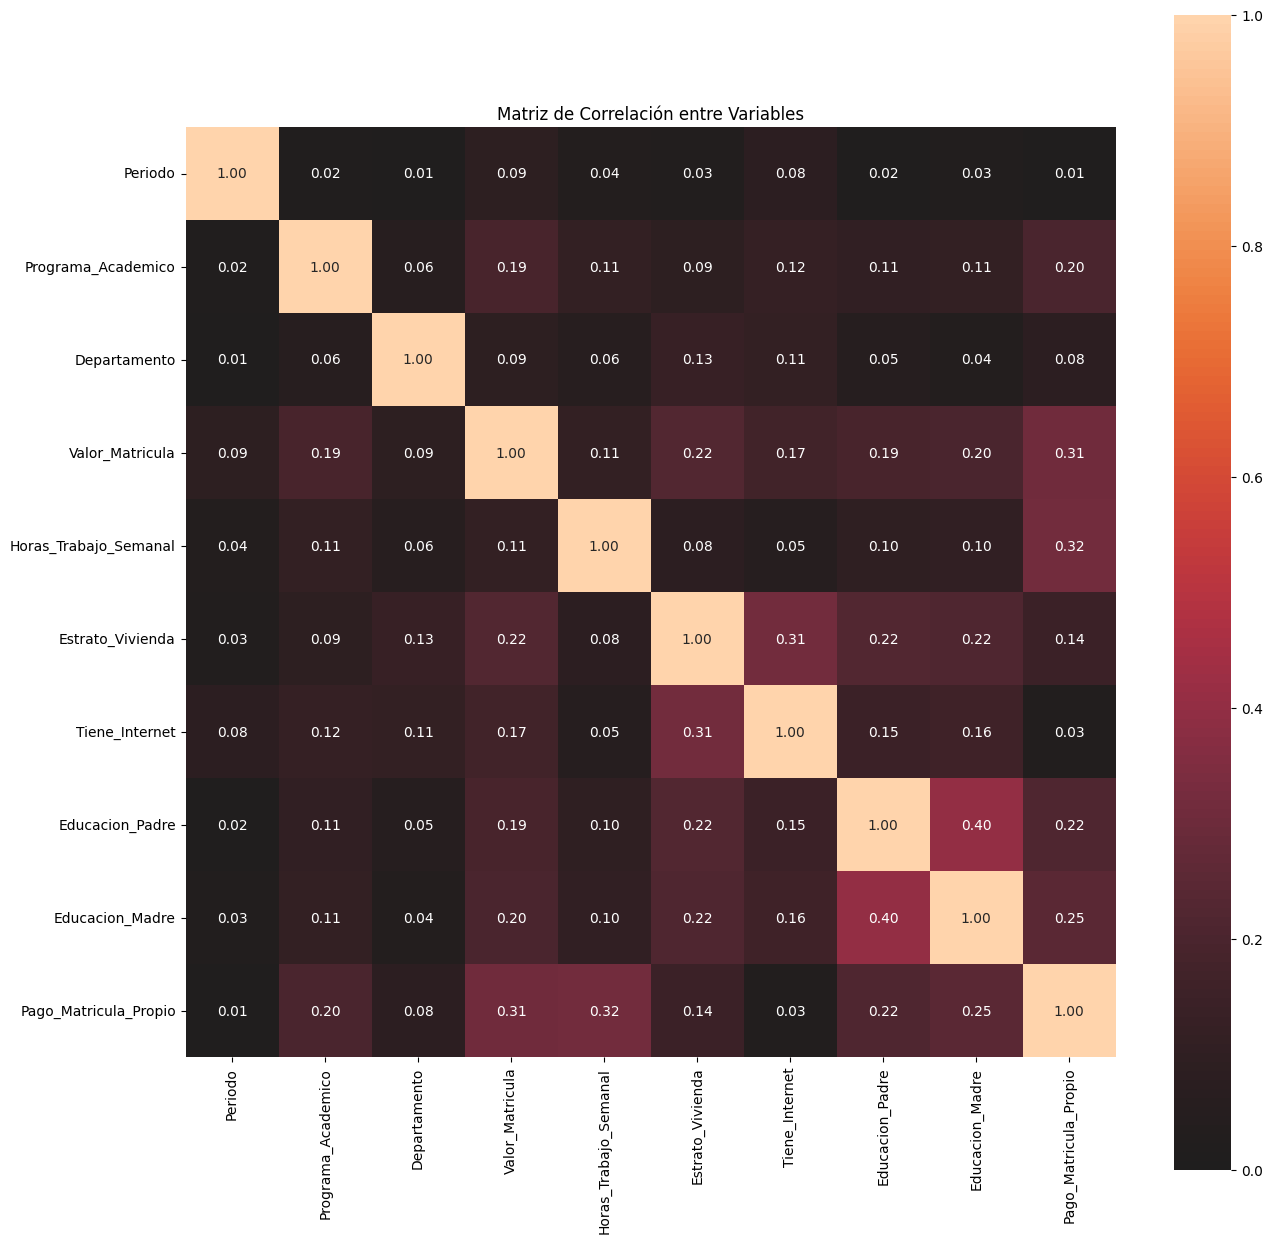

In [156]:
from dython.nominal import associations

train_explanatory = train.drop(columns=['ID', 'Rendimiento_Global'])
train_categorias = train_explanatory.select_dtypes('object')
associations(train_categorias, title='Matriz de Correlación entre Variables')
plt.show()

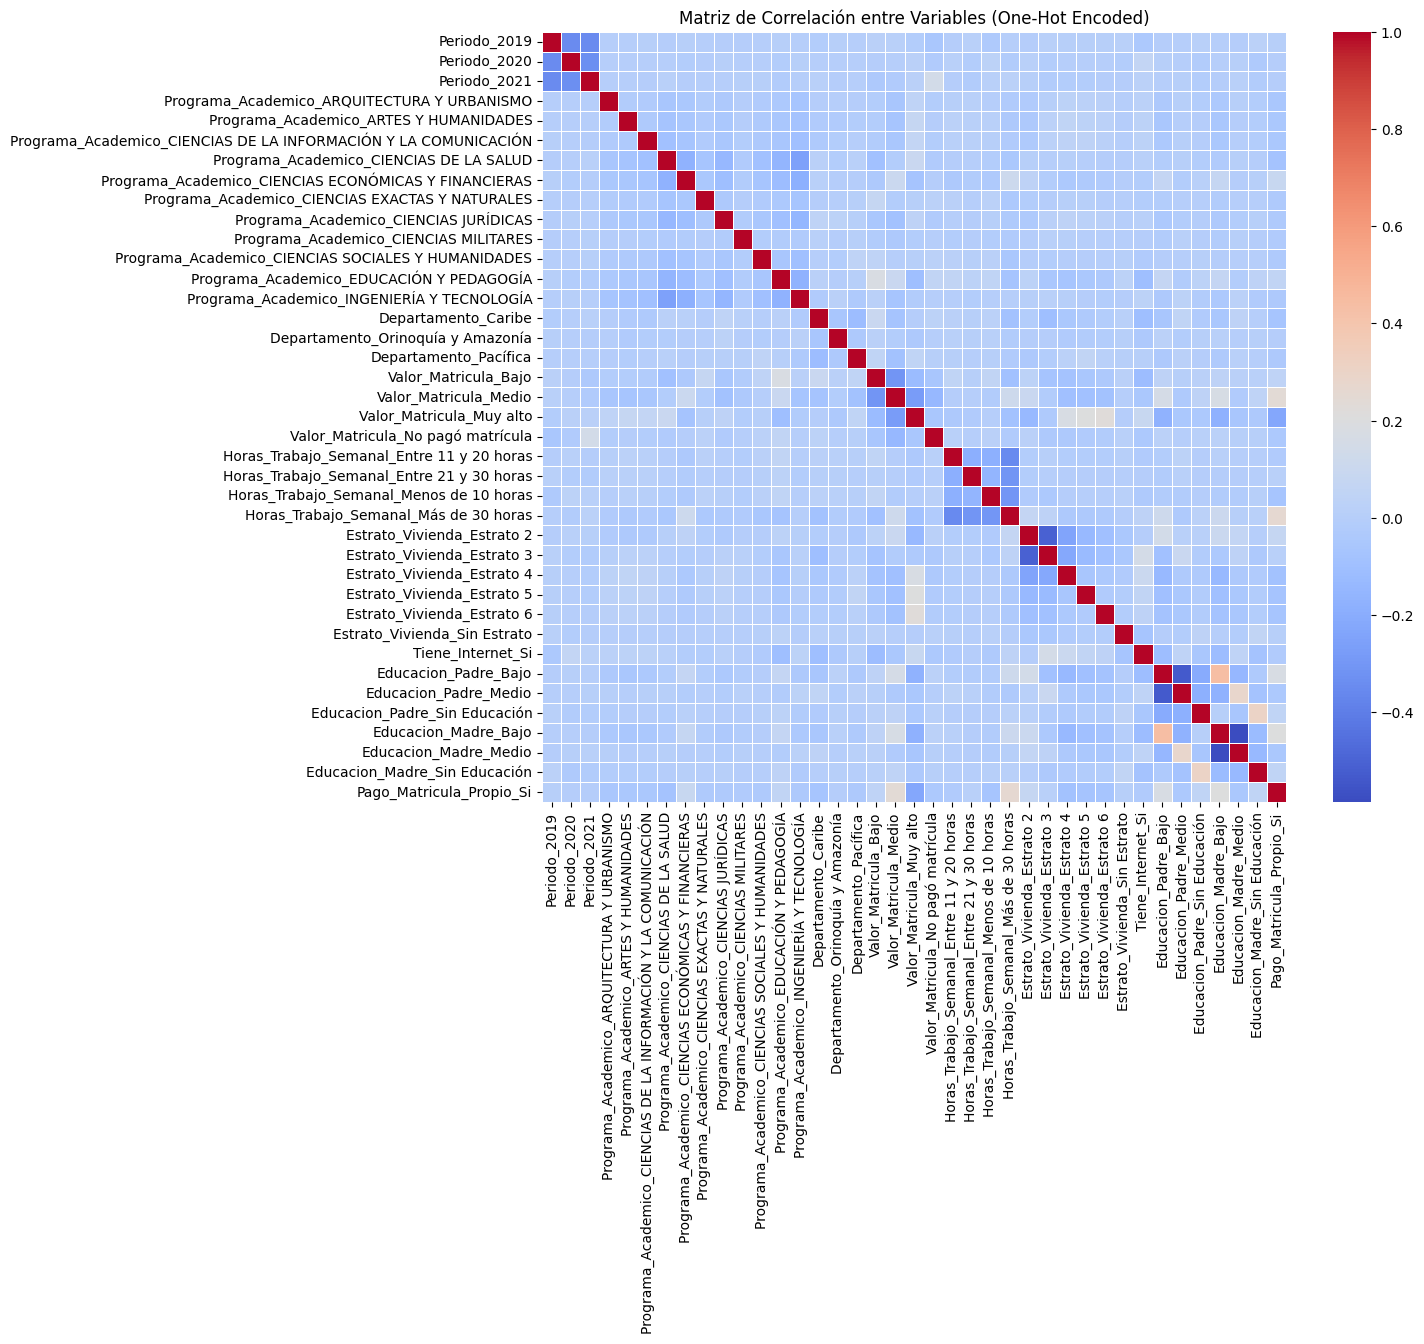

In [153]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train_explanatory = train.drop(columns=['ID', 'Rendimiento_Global'])
train_encoded = pd.get_dummies(train_explanatory, drop_first=True)
matriz_correlacion = train_encoded.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_correlacion, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación entre Variables (One-Hot Encoded)')
plt.show()


In [158]:
print("\n\nConteo de valores no nulos por columna:\n")
print(train_encoded.count())



Conteo de valores no nulos por columna:

Periodo_2019                                                       692500
Periodo_2020                                                       692500
Periodo_2021                                                       692500
Programa_Academico_ARQUITECTURA Y URBANISMO                        692500
Programa_Academico_ARTES Y HUMANIDADES                             692500
Programa_Academico_CIENCIAS DE LA INFORMACIÓN Y LA COMUNICACIÓN    692500
Programa_Academico_CIENCIAS DE LA SALUD                            692500
Programa_Academico_CIENCIAS ECONÓMICAS Y FINANCIERAS               692500
Programa_Academico_CIENCIAS EXACTAS Y NATURALES                    692500
Programa_Academico_CIENCIAS JURÍDICAS                              692500
Programa_Academico_CIENCIAS MILITARES                              692500
Programa_Academico_CIENCIAS SOCIALES Y HUMANIDADES                 692500
Programa_Academico_EDUCACIÓN Y PEDAGOGÍA                           69